<a href="https://colab.research.google.com/github/dimpupradev/base/blob/main/DAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
t=[[5],[7],[12],[16],[20]]
m=[40,120,180,210,240]
LR.fit(t,m)
LinearRegression()
LR.predict([[5.5]])

array([78.64935065])

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
t=[[5],[7],[12],[16],[20]]
m=[40,120,180,210,240]
LR.fit(t,m)

LinearRegression()

In [ ]:
LR.predict([[5]])

array([72.54545455])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as ttp
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt

In [ ]:
data_true=pd.read_csv("/content/area.csv")
data_fake=pd.read_csv("/content/netflix_revenue_updated.csv")

In [ ]:
data_true.head(5)

,area,price
0,1000,20000
1,1500,30000
2,2500,39000
3,9500,80000
4,10250,89500


In [ ]:
data_fake.head(5)

,Date,Global Revenue,UCAN Streaming Revenue,EMEA Streaming Revenue,LATM Streaming Revenue,APAC Streaming Revenue,UCAN Members,EMEA Members,LATM Members,APAC Members,UCAN ARPU,EMEA ARPU,LATM ARPU,APAC ARPU,Netflix Streaming Memberships
0,31-03-2019,4520992000,2256851000,1233379000,630472000,319602000,66633000,42542000,27547000,12141000,11.45,10.23,7.84,9.37,148863000
1,30-06-2019,4923116000,2501199000,1319087000,677136000,349494000,66501000,44229000,27890000,12942000,12.52,10.13,8.14,9.29,151562000
2,30-09-2019,5244905000,2621250000,1428040000,741434000,382304000,67114000,47355000,29380000,14485000,13.08,10.40,8.63,9.29,158334000
3,31-12-2019,5467434000,2671908000,1562561000,746392000,418121000,67662000,51778000,31417000,16233000,13.22,10.51,8.18,9.07,167090000
4,31-03-2020,5767691000,2702776000,1723474000,793453000,483660000,69969000,58734000,34318000,19835000,13.09,10.40,8.05,8.94,182856000


In [ ]:
data_true.shape, data_fake.shape

((11, 2), (17, 15))

In [ ]:
data_true["class"]=1
data_fake["class"]=0


In [ ]:
data_true_manual_testing = data_true.tail(10)
for i in range(15,50,-1):
  data_true.drop([i],axis=0, inplace=True)
data_fake_manual_testing = data_fake.tail(10)
for i in range(15,50,-1):
  data_fake.drop([i],axis=0,inplace=True)

In [ ]:
data_manual_testing = pd.concat([data_fake_manual_testing,data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")


In [ ]:
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)

/usr/local/lib/python3.10/dist-packages/lida/components/summarizer.py:74: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cast_date_col = pd.to_datetime(df[column], errors='coerce')


,Date,Global Revenue,UCAN Streaming Revenue,EMEA Streaming Revenue,LATM Streaming Revenue,APAC Streaming Revenue,UCAN Members,EMEA Members,LATM Members,APAC Members,UCAN ARPU,EMEA ARPU,LATM ARPU,APAC ARPU,Netflix Streaming Memberships,class,area,price
0,31-03-2019,4.520992e+09,2.256851e+09,1.233379e+09,630472000.0,319602000.0,66633000.0,42542000.0,27547000.0,12141000.0,11.45,10.23,7.84,9.37,148863000.0,0,NaN,NaN
1,30-06-2019,4.923116e+09,2.501199e+09,1.319087e+09,677136000.0,349494000.0,66501000.0,44229000.0,27890000.0,12942000.0,12.52,10.13,8.14,9.29,151562000.0,0,NaN,NaN
2,30-09-2019,5.244905e+09,2.621250e+09,1.428040e+09,741434000.0,382304000.0,67114000.0,47355000.0,29380000.0,14485000.0,13.08,10.40,8.63,9.29,158334000.0,0,NaN,NaN
3,31-12-2019,5.467434e+09,2.671908e+09,1.562561e+09,746392000.0,418121000.0,67662000.0,51778000.0,31417000.0,16233000.0,13.22,10.51,8.18,9.07,167090000.0,0,NaN,NaN
4,31-03-2020,5.767691e+09,2.702776e+09,1.723474e+09,793453000.0,483660000.0,69969000.0,58734000.0,34318000.0,19835000.0,13.09,10.40,8.05,8.94,182856000.0,0,NaN,NaN
5,30-06-2020,6.148286e+09,2.839670e+09,1.892537e+09,785368000.0,569140000.0,72904000.0,61483000.0,36068000.0,22492000.0,13.25,10.50,7.44,8.96,192947000.0,0,NaN,NaN
6,30-09-2020,6.435637e+09,2.933445e+09,2.019083e+09,789384000.0,634891000.0,73081000.0,62242000.0,36324000.0,23504000.0,13.40,10.88,7.27,9.20,195151000.0,0,NaN,NaN
7,31-12-2020,6.644442e+09,2.979505e+09,2.137158e+09,788522000.0,684609000.0,73936000.0,66698000.0,37537000.0,25492000.0,13.51,11.05,7.12,9.32,203663000.0,0,NaN,NaN
8,31-03-2021,7.163282e+09,3.170972e+09,2.343674e+09,836647000.0,762414000.0,74384000.0,68508000.0,37894000.0,26853000.0,14.25,11.56,7.39,9.71,207639000.0,0,NaN,NaN
9,30-06-2021,7.341777e+09,3.234643e+09,2.400480e+09,860882000.0,799480000.0,73951000.0,68696000.0,38658000.0,27875000.0,14.54,11.66,7.50,9.74,209180000.0,0,NaN,NaN


Global Revenue
4.520992e+09    1
4.923116e+09    1
5.244905e+09    1
5.467434e+09    1
5.767691e+09    1
6.148286e+09    1
6.435637e+09    1
6.644442e+09    1
7.163282e+09    1
7.341777e+09    1
7.483467e+09    1
7.709318e+09    1
7.852053e+09    1
7.867767e+09    1
7.925589e+09    1
7.970141e+09    1
8.161503e+09    1
Name: UCAN Streaming Revenue, dtype: int64


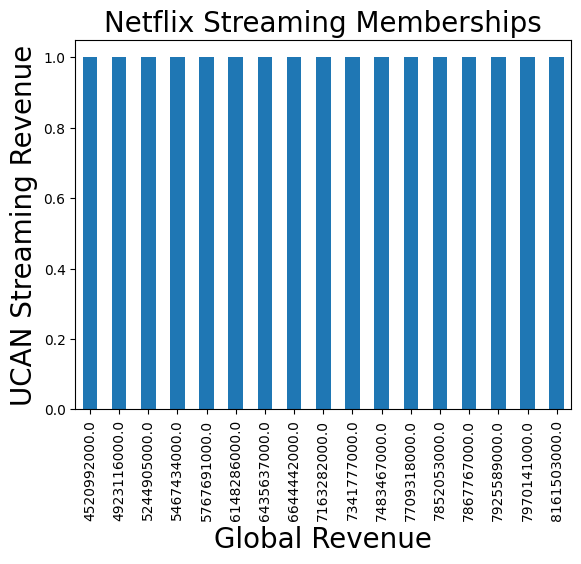

In [ ]:
print(data_merge.groupby(['Global Revenue'])['UCAN Streaming Revenue'].count())
data_merge.groupby(['Global Revenue'])['UCAN Streaming Revenue'].count().plot(kind="bar")
plt.title("Netflix Streaming Memberships",size=20)
plt.xlabel("Global Revenue",size=20)
plt.ylabel("UCAN Streaming Revenue",size=20)
plt.show()


Global Revenue
4.520992e+09    1
4.923116e+09    1
5.244905e+09    1
5.467434e+09    1
5.767691e+09    1
6.148286e+09    1
6.435637e+09    1
6.644442e+09    1
7.163282e+09    1
7.341777e+09    1
7.483467e+09    1
7.709318e+09    1
7.852053e+09    1
7.867767e+09    1
7.925589e+09    1
7.970141e+09    1
8.161503e+09    1
Name: UCAN Streaming Revenue, dtype: int64
0 = Fake news
1 = True news


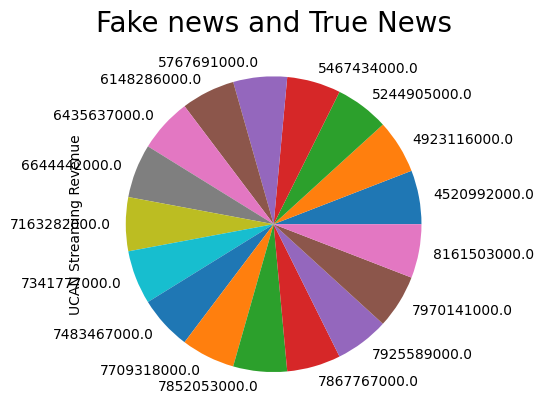

In [ ]:
print(data_merge.groupby(['Global Revenue'])['UCAN Streaming Revenue'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['Global Revenue'])['UCAN Streaming Revenue'].count().plot(kind="pie")
plt.title("Fake news and True News",size=20)
plt.show()


In [ ]:
data = data_merge.drop(["Global Revenue","UCAN Streaming Revenue","EMEA Streaming Revenue"], axis=1)
data.head(10)

/usr/local/lib/python3.10/dist-packages/lida/components/summarizer.py:74: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cast_date_col = pd.to_datetime(df[column], errors='coerce')


,Date,LATM Streaming Revenue,APAC Streaming Revenue,UCAN Members,EMEA Members,LATM Members,APAC Members,UCAN ARPU,EMEA ARPU,LATM ARPU,APAC ARPU,Netflix Streaming Memberships,class,area,price
0,31-03-2019,630472000.0,319602000.0,66633000.0,42542000.0,27547000.0,12141000.0,11.45,10.23,7.84,9.37,148863000.0,0,NaN,NaN
1,30-06-2019,677136000.0,349494000.0,66501000.0,44229000.0,27890000.0,12942000.0,12.52,10.13,8.14,9.29,151562000.0,0,NaN,NaN
2,30-09-2019,741434000.0,382304000.0,67114000.0,47355000.0,29380000.0,14485000.0,13.08,10.40,8.63,9.29,158334000.0,0,NaN,NaN
3,31-12-2019,746392000.0,418121000.0,67662000.0,51778000.0,31417000.0,16233000.0,13.22,10.51,8.18,9.07,167090000.0,0,NaN,NaN
4,31-03-2020,793453000.0,483660000.0,69969000.0,58734000.0,34318000.0,19835000.0,13.09,10.40,8.05,8.94,182856000.0,0,NaN,NaN
5,30-06-2020,785368000.0,569140000.0,72904000.0,61483000.0,36068000.0,22492000.0,13.25,10.50,7.44,8.96,192947000.0,0,NaN,NaN
6,30-09-2020,789384000.0,634891000.0,73081000.0,62242000.0,36324000.0,23504000.0,13.40,10.88,7.27,9.20,195151000.0,0,NaN,NaN
7,31-12-2020,788522000.0,684609000.0,73936000.0,66698000.0,37537000.0,25492000.0,13.51,11.05,7.12,9.32,203663000.0,0,NaN,NaN
8,31-03-2021,836647000.0,762414000.0,74384000.0,68508000.0,37894000.0,26853000.0,14.25,11.56,7.39,9.71,207639000.0,0,NaN,NaN
9,30-06-2021,860882000.0,799480000.0,73951000.0,68696000.0,38658000.0,27875000.0,14.54,11.66,7.50,9.74,209180000.0,0,NaN,NaN


In [ ]:
data=data.sample(frac=1)
data.head(10)


/usr/local/lib/python3.10/dist-packages/lida/components/summarizer.py:74: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cast_date_col = pd.to_datetime(df[column], errors='coerce')


,Date,LATM Streaming Revenue,APAC Streaming Revenue,UCAN Members,EMEA Members,LATM Members,APAC Members,UCAN ARPU,EMEA ARPU,LATM ARPU,APAC ARPU,Netflix Streaming Memberships,class,area,price
13,30-06-2022,1.030234e+09,907719000.0,73283000.0,72966000.0,39624000.0,34799000.0,15.95,11.17,8.67,8.83,220672000.0,0,NaN,NaN
12,31-03-2022,9.989480e+08,916754000.0,74579000.0,73733000.0,39610000.0,33719000.0,14.91,11.56,8.37,9.21,221641000.0,0,NaN,NaN
14,30-09-2022,1.023945e+09,889037000.0,73387000.0,73534000.0,39936000.0,36228000.0,16.37,10.81,8.58,8.34,223085000.0,0,NaN,NaN
11,31-12-2021,9.641500e+08,870705000.0,75215000.0,74036000.0,39961000.0,32632000.0,14.78,11.64,8.14,9.26,221844000.0,0,NaN,NaN
0,31-03-2019,6.304720e+08,319602000.0,66633000.0,42542000.0,27547000.0,12141000.0,11.45,10.23,7.84,9.37,148863000.0,0,NaN,NaN
3,31-12-2019,7.463920e+08,418121000.0,67662000.0,51778000.0,31417000.0,16233000.0,13.22,10.51,8.18,9.07,167090000.0,0,NaN,NaN
1,30-06-2019,6.771360e+08,349494000.0,66501000.0,44229000.0,27890000.0,12942000.0,12.52,10.13,8.14,9.29,151562000.0,0,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,26150.0,202900.0
2,30-09-2019,7.414340e+08,382304000.0,67114000.0,47355000.0,29380000.0,14485000.0,13.08,10.40,8.63,9.29,158334000.0,0,NaN,NaN
10,30-09-2021,9.152970e+08,834002000.0,74024000.0,70500000.0,38988000.0,30051000.0,14.68,11.65,7.86,9.60,213563000.0,0,NaN,NaN


In [ ]:
data.isnull().sum()

Date                              11
LATM Streaming Revenue            11
APAC Streaming Revenue            11
UCAN Members                      11
EMEA  Members                     11
LATM Members                      11
APAC Members                      11
UCAN ARPU                         11
EMEA ARPU                         11
LATM  ARPU                        11
APAC  ARPU                        11
Netflix Streaming Memberships     11
class                              0
area                              17
price                             17
dtype: int64

In [ ]:
x=data["APAC Members"]
y=data["class"]


In [ ]:
print(f"Number of samples in x: {len(x)}")
print(f"Number of samples in y: {len(y)}")

Number of samples in x: 28
Number of samples in y: 28


In [ ]:
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
print(x_train.head())

2            NaN
4            NaN
15    38023000.0
6     23504000.0
12    33719000.0
Name: APAC Members, dtype: float64


In [ ]:
x_train=np.array(x_train)
x_test=np.array(x_test)

In [ ]:
if type(x_train[0]) != str or type(x_test[0]) != str:
  x_train = [str(x) for X in x_train]
  x_test = [str(x) for X in x_test]

In [ ]:
vector = TfidfVectorizer() # creating object
#Learn vocabulary and IDF(inverse document frequency), return document-term matrix.
#IDF returns numerical statics that how the word is important to the document
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)

In [ ]:

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xv_train,y_train)
accuracy = LR.score(xv_test,y_test).round(2)
print("Accuracy is" , accuracy)
pred_LR= LR.predict(xv_test)
print(classification_report(y_test,pred_LR))

Accuracy is 0.43
              precision    recall  f1-score   support

           0       0.43      1.00      0.60         3
           1       0.00      0.00      0.00         4

    accuracy                           0.43         7
   macro avg       0.21      0.50      0.30         7
weighted avg       0.18      0.43      0.26         7



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[3 0]
 [4 0]]


<Axes: >

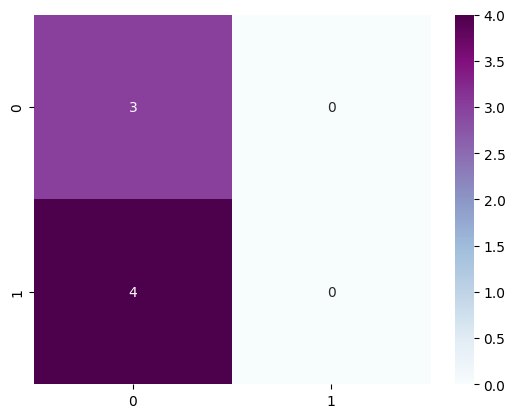

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,pred_LR)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="BuPu",annot=True)


In [ ]:
 #Random forest
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_train)
RFC.score(xv_test,y_test)
pred_RFC = RFC.predict(xv_test)
print(classification_report(y_test,pred_RFC))


              precision    recall  f1-score   support

           0       0.43      1.00      0.60         3
           1       0.00      0.00      0.00         4

    accuracy                           0.43         7
   macro avg       0.21      0.50      0.30         7
weighted avg       0.18      0.43      0.26         7



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[3 0]
 [4 0]]


<Axes: >

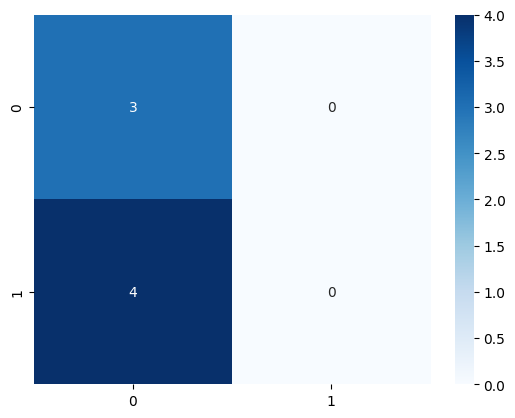

In [ ]:
cm= confusion_matrix(y_test,pred_RFC)
print(cm)
import seaborn as sns
sns.heatmap(cm,cmap="Blues",annot=True)


    area  price
0   1000  20000
1   1500  30000
2   2500  39000
3   9500  80000
4  10250  89500
Mean Squared Error: 10599073.14016114


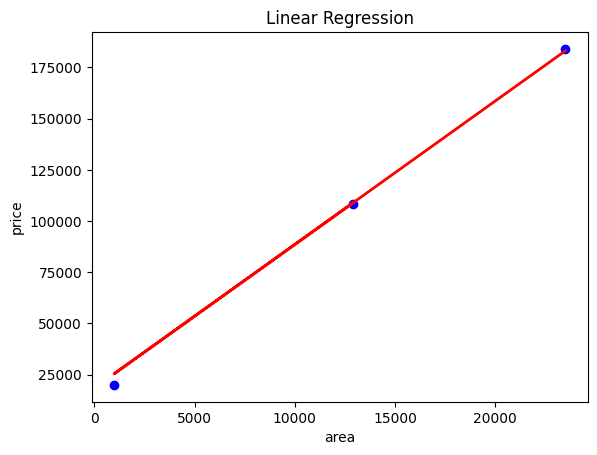

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the excel dataset
data = pd.read_excel('/content/data.xlsx')

# Display the first few rows of the dataset
print(data.head())

# Split the data into features (X) and target variable (y)
X = data[['area']]
y = data['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the data and regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('area')
plt.ylabel('price')
plt.title('Linear Regression')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split as ttp
from sklearn.metrics import classification_report
data=pd.read_excel('/content/manual.xlsx')
x=data["title"]
y=data["class"]
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)
#Logistic Regression:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xv_train,y_train)
accuracy = LR.score(xv_test,y_test).round(2)
print("Accuracy is" , accuracy)
pred_LR= LR.predict(xv_test)
print(classification_report(y_test,pred_LR))

Accuracy is 0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.40      1.00      0.57         2

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df=pd.read_csv('/content/heart.csv')
h=df.head(10)
t=df.tail(10)
print(df.shape)
for i in range(293,283,-1):
  df.drop([i],axis=0,inplace=True)
for i in range(10):
  df.drop([i],axis=0,inplace=True)
  dfmt=pd.concat([h,t],axis=0)
  dfmt.to_csv("test_file.csv")
data=pd.read_csv('/content/test_file.csv')
print(data)


(303, 14)
    Unnamed: 0  age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  \
0            0   63    1   3     145   233    1        0       150     0   
1            1   37    1   2     130   250    0        1       187     0   
2            2   41    0   1     130   204    0        0       172     0   
3            3   56    1   1     120   236    0        1       178     0   
4            4   57    0   0     120   354    0        1       163     1   
5            5   57    1   0     140   192    0        1       148     0   
6            6   56    0   1     140   294    0        0       153     0   
7            7   44    1   1     120   263    0        1       173     0   
8            8   52    1   2     172   199    1        1       162     0   
9            9   57    1   2     150   168    0        1       174     0   
10         293   67    1   2     152   212    0        0       150     0   
11         294   44    1   0     120   169    0        1       144     1   
12

0.04 
 [0.56059718 0.68688374 0.57281846 0.32839286]


<Axes: >

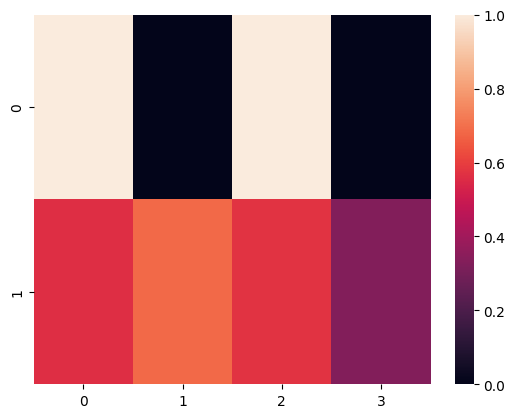

In [11]:
data=data.sample(frac=1)
data.head(10)
x=data[["chol"]]
y=data["output"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
acc=model.score(X_test,y_test).round(2)
y_pred = model.predict(X_test)
print(acc,'\n',y_pred)
sns.heatmap([y_test,y_pred])

<Axes: >

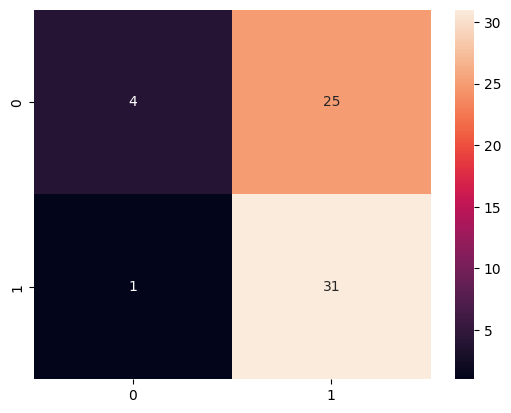

In [6]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
